In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
    # wget didnt work so I used urlib.request to get the data from the link address copied from the github.
import urllib.request
url = 'https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip'
filename = 'pizza_steak.zip'
file = urllib.request.urlretrieve(url, filename) # This will download the file on the computer
  # To extract the pizza file.zip and save it to the same location as your present notebook location.
zip_ref = zipfile.ZipFile("./pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

NameError: name 'zipfile' is not defined

In [5]:
!dir pizza_steak\train\

 Volume in drive C is Windows-SSD
 Volume Serial Number is D242-1268

 Directory of c:\Deep_Learning\TensorFlow_For_Deep_Learning\pizza_steak\train

04-11-2024  10:09    <DIR>          .
04-11-2024  10:09    <DIR>          ..
04-11-2024  10:09    <DIR>          pizza
04-11-2024  10:09    <DIR>          steak
               0 File(s)              0 bytes
               4 Dir(s)  346,283,872,256 bytes free


In [6]:
!dir pizza_steak\train\steak\

 Volume in drive C is Windows-SSD
 Volume Serial Number is D242-1268

 Directory of c:\Deep_Learning\TensorFlow_For_Deep_Learning\pizza_steak\train\steak

04-11-2024  10:09    <DIR>          .
04-11-2024  10:09    <DIR>          ..
04-11-2024  10:09            36,185 1000205.jpg
04-11-2024  10:09            34,497 100135.jpg
04-11-2024  10:09           116,802 101312.jpg
04-11-2024  10:09            56,754 1021458.jpg
04-11-2024  10:09            34,143 1032846.jpg
04-11-2024  10:09            24,688 10380.jpg
04-11-2024  10:09            37,134 1049459.jpg
04-11-2024  10:09            49,841 1053665.jpg
04-11-2024  10:09            59,983 1068516.jpg
04-11-2024  10:09            28,996 1068975.jpg
04-11-2024  10:09            29,525 1081258.jpg
04-11-2024  10:09            49,577 1090122.jpg
04-11-2024  10:09            59,976 1093966.jpg
04-11-2024  10:09            60,253 1098844.jpg
04-11-2024  10:09            69,843 1100074.jpg
04-11-2024  10:09            45,470 1105280.jpg
04-1

In [7]:
import os

# Walk through pizza_steak directory and list number of files
for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in 'pizza_steak'.
There are 2 directories and 0 images in 'pizza_steak\test'.
There are 0 directories and 250 images in 'pizza_steak\test\pizza'.
There are 0 directories and 250 images in 'pizza_steak\test\steak'.
There are 2 directories and 0 images in 'pizza_steak\train'.
There are 0 directories and 750 images in 'pizza_steak\train\pizza'.
There are 0 directories and 750 images in 'pizza_steak\train\steak'.


In [8]:
# Another way to find out how many images are in a file
num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))

num_steak_images_train

750

In [29]:
# Get the class names (programmatically, this is much more helpful with a longer list of classes)
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train/") # turn our training path into a Python path
class_names = np.array(sorted([item.name for item in data_dir.glob('*')])) # created a list of class_names from the subdirectories
print(class_names)

['pizza' 'steak']


In [10]:
# View an image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Setup target directory (we'll view images from here)
  target_folder = target_dir+target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}") # show the shape of the image

  return img

Image shape: (384, 512, 3)


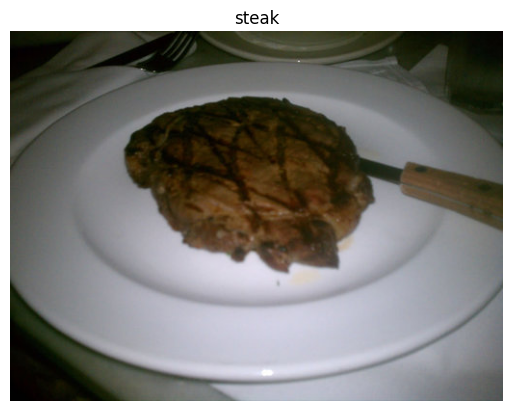

In [11]:
# View a random image from the training dataset
img = view_random_image(target_dir="pizza_steak/train/",
                        target_class="steak")

Image shape: (512, 507, 3)


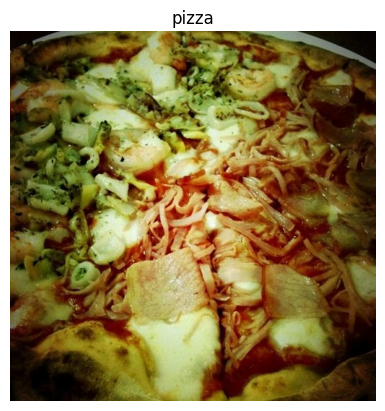

In [12]:
# View a random image from the training dataset
img = view_random_image(target_dir="pizza_steak/train/",
                        target_class="pizza")

In [13]:
img

array([[[ 7,  0,  0],
        [ 8,  0,  0],
        [10,  2,  0],
        ...,
        [ 9,  3,  3],
        [ 8,  2,  2],
        [ 8,  2,  2]],

       [[ 8,  0,  0],
        [ 9,  1,  0],
        [10,  2,  0],
        ...,
        [10,  4,  4],
        [ 9,  3,  3],
        [ 9,  3,  3]],

       [[ 9,  1,  0],
        [10,  2,  0],
        [11,  3,  1],
        ...,
        [ 9,  3,  3],
        [ 9,  3,  3],
        [ 8,  2,  2]],

       ...,

       [[ 2,  1,  0],
        [ 2,  1,  0],
        [ 5,  1,  0],
        ...,
        [19, 12,  4],
        [19, 12,  4],
        [19, 10,  3]],

       [[ 5,  1,  0],
        [ 6,  2,  1],
        [ 7,  3,  2],
        ...,
        [19, 12,  4],
        [18, 11,  3],
        [19, 10,  3]],

       [[ 7,  3,  2],
        [ 8,  4,  3],
        [ 8,  4,  3],
        ...,
        [18, 11,  3],
        [17, 10,  2],
        [18,  9,  2]]], dtype=uint8)

In [14]:
tf.constant(img)

<tf.Tensor: shape=(512, 507, 3), dtype=uint8, numpy=
array([[[ 7,  0,  0],
        [ 8,  0,  0],
        [10,  2,  0],
        ...,
        [ 9,  3,  3],
        [ 8,  2,  2],
        [ 8,  2,  2]],

       [[ 8,  0,  0],
        [ 9,  1,  0],
        [10,  2,  0],
        ...,
        [10,  4,  4],
        [ 9,  3,  3],
        [ 9,  3,  3]],

       [[ 9,  1,  0],
        [10,  2,  0],
        [11,  3,  1],
        ...,
        [ 9,  3,  3],
        [ 9,  3,  3],
        [ 8,  2,  2]],

       ...,

       [[ 2,  1,  0],
        [ 2,  1,  0],
        [ 5,  1,  0],
        ...,
        [19, 12,  4],
        [19, 12,  4],
        [19, 10,  3]],

       [[ 5,  1,  0],
        [ 6,  2,  1],
        [ 7,  3,  2],
        ...,
        [19, 12,  4],
        [18, 11,  3],
        [19, 10,  3]],

       [[ 7,  3,  2],
        [ 8,  4,  3],
        [ 8,  4,  3],
        ...,
        [18, 11,  3],
        [17, 10,  2],
        [18,  9,  2]]], dtype=uint8)>

In [15]:
img / 255 # Normalizing all values to be between 0 & 1

array([[[0.02745098, 0.        , 0.        ],
        [0.03137255, 0.        , 0.        ],
        [0.03921569, 0.00784314, 0.        ],
        ...,
        [0.03529412, 0.01176471, 0.01176471],
        [0.03137255, 0.00784314, 0.00784314],
        [0.03137255, 0.00784314, 0.00784314]],

       [[0.03137255, 0.        , 0.        ],
        [0.03529412, 0.00392157, 0.        ],
        [0.03921569, 0.00784314, 0.        ],
        ...,
        [0.03921569, 0.01568627, 0.01568627],
        [0.03529412, 0.01176471, 0.01176471],
        [0.03529412, 0.01176471, 0.01176471]],

       [[0.03529412, 0.00392157, 0.        ],
        [0.03921569, 0.00784314, 0.        ],
        [0.04313725, 0.01176471, 0.00392157],
        ...,
        [0.03529412, 0.01176471, 0.01176471],
        [0.03529412, 0.01176471, 0.01176471],
        [0.03137255, 0.00784314, 0.00784314]],

       ...,

       [[0.00784314, 0.00392157, 0.        ],
        [0.00784314, 0.00392157, 0.        ],
        [0.01960784, 0

In [7]:
import tensorflow as tf 
from tensorflow.keras.utils import image_dataset_from_directory  
# set the seed
tf.random.set_seed(42)
 
# Preprocess data (get all of the pixel values between 0 & 1, also called scaling/normalization)
#train_datagen = ImageDataGenerator(rescale=1./255)
#valid_datagen = ImageDataGenerator(rescale=1./255)
# DEPRECATED!
 
# Setup paths to our data directories
train_dir = 'pizza_steak/train'
test_dir = 'pizza_steak/test'
 
# Import data from directories and turn it into batches
scaling_layer = tf.keras.layers.Rescaling(1./255)
train_data = image_dataset_from_directory(directory=train_dir,
                                          batch_size=32,
                                          image_size=(224, 224),
                                          seed=42)
train_data_scaled = train_data.map(lambda x, y: (scaling_layer(x), y))
valid_data = image_dataset_from_directory(directory=test_dir,
                                          batch_size=32,
                                          image_size=(224, 224),
                                          seed=42)
valid_data_scaled = valid_data.map(lambda x, y: (scaling_layer(x), y))
 
# Build a CNN model (same as the Tiny VGG on the CNN explainer website)
model_1 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation='relu',
                           input_shape=(224, 224, 3)),
    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2,
                              padding='valid'),
    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
 
# Compile our CNN
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])
 
# Fit the model
history_1 = model_1.fit(train_data_scaled, 
                        epochs=5,
                        steps_per_epoch=len(train_data_scaled),
                        validation_data=valid_data_scaled,
                        validation_steps=len(valid_data_scaled))

Found 1500 files belonging to 2 classes.
Found 500 files belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 7s 57ms/step - loss: 0.6614 - accuracy: 0.6127 - val_loss: 0.5366 - val_accuracy: 0.7140
Epoch 2/5
47/47 [==============================] - 2s 48ms/step - loss: 0.4766 - accuracy: 0.7867 - val_loss: 0.5296 - val_accuracy: 0.7340
Epoch 3/5
47/47 [==============================] - 2s 48ms/step - loss: 0.4311 - accuracy: 0.8173 - val_loss: 0.3750 - val_accuracy: 0.8480
Epoch 4/5
47/47 [==============================] - 2s 45ms/step - loss: 0.3821 - accuracy: 0.8427 - val_loss: 0.3296 - val_accuracy: 0.8780
Epoch 5/5
47/47 [==============================] - 2s 46ms/step - loss: 0.3571 - accuracy: 0.8513 - val_loss: 0.3461 - val_accuracy: 0.8420


In [20]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [18]:
!nvidia-smi

Mon Nov  4 13:18:21 2024       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 552.44                 Driver Version: 552.44         CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                     TCC/WDDM  | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 3060 ...  WDDM  |   00000000:01:00.0  On |                  N/A |
| N/A   61C    P0             60W /   80W |    4168MiB /   6144MiB |      2%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [19]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

In [20]:
print(tf.__version__)

2.10.0


In [3]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)
print("Num GPUs Available:", len(tf.config.list_physical_devices('GPU')))

TensorFlow version: 2.10.0
Num GPUs Available: 1


In [22]:
import tensorflow as tf
import time

# Create a large random tensor
x = tf.random.normal([10000, 10000])

# Run on GPU
with tf.device("GPU:0"):
    start = time.time()
    tf.matmul(x, x)
    print("GPU time:", time.time() - start)

# Run on CPU
with tf.device("CPU:0"):
    start = time.time()
    tf.matmul(x, x)
    print("CPU time:", time.time() - start)


GPU time: 0.006012439727783203
CPU time: 8.697069644927979


In [6]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(1, activation = "sigmoid"),
])

model_2.compile(
    loss = "binary_crossentropy",
    optimizer = "rmsprop",
    metrics = ["accuracy"]
)

history_2 = model_2.fit(train_data_scaled, 
                        epochs=5,
                        steps_per_epoch=len(train_data_scaled),
                        validation_data=valid_data_scaled,
                        validation_steps=len(valid_data_scaled))

Epoch 1/5
47/47 [==============================] - 2s 26ms/step - loss: 1.8718 - accuracy: 0.5033 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 1s 25ms/step - loss: 0.6928 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 1s 29ms/step - loss: 0.6927 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 1s 26ms/step - loss: 0.6927 - accuracy: 0.5000 - val_loss: 0.6919 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 1s 25ms/step - loss: 1.8621 - accuracy: 0.4900 - val_loss: 0.6931 - val_accuracy: 0.5000


In [7]:
model_2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 150528)            0         
                                                                 
 dense_4 (Dense)             (None, 4)                 602116    
                                                                 
 dense_5 (Dense)             (None, 4)                 20        
                                                                 
 dense_6 (Dense)             (None, 1)                 5         
                                                                 
Total params: 602,141
Trainable params: 602,141
Non-trainable params: 0
_________________________________________________________________


### Wow. One of the most noticeable things here is the much larger number of parameters in `model_2` versus `model_1`.

`model_2` has 602,141 trainable parameters where as `model_1` has only 31,101. And despite this difference, `model_1` still far and large out performs `model_2`.

> 🔑 **Note:** You can think of trainable parameters as *patterns a model can learn from data*. Intuitiely, you might think more is better. And in some cases it is. But in this case, the difference here is in the two different styles of model we're using. Where a series of dense layers have a number of different learnable parameters connected to each other and hence a higher number of possible learnable patterns, **a convolutional neural network seeks to sort out and learn the most important patterns in an image**. So even though there are less learnable parameters in our convolutional neural network, these are often more helpful in decphering between different **features** in an image.

Since our previous model didn't work, do you have any ideas of how we might make it work?

How about we increase the number of layers? 

And maybe even increase the number of neurons in each layer?

More specifically, we'll increase the number of neurons (also called hidden units) in each dense layer from 4 to 100 and add an extra layer.

> 🔑 **Note:** Adding extra layers or increasing the number of neurons in each layer is often referred to as increasing the **complexity** of your model.

In [8]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
    tf.keras.layers.Dense(100, activation = "relu"),
    tf.keras.layers.Dense(10, activation = "relu"),
    tf.keras.layers.Dense(100, activation = "relu"),
    tf.keras.layers.Dense(1, activation = "sigmoid"),
])

model_3.compile(
    loss = "binary_crossentropy",
    optimizer = "adam",
    metrics = ["accuracy"]
)

history_3 = model_3.fit(train_data_scaled, 
                        epochs=20,
                        steps_per_epoch=len(train_data_scaled),
                        validation_data=valid_data_scaled,
                        validation_steps=len(valid_data_scaled))

Epoch 1/20
47/47 [==============================] - 2s 29ms/step - loss: 1.4757 - accuracy: 0.5720 - val_loss: 0.6716 - val_accuracy: 0.6120
Epoch 2/20
47/47 [==============================] - 1s 25ms/step - loss: 0.6162 - accuracy: 0.7040 - val_loss: 0.4891 - val_accuracy: 0.7760
Epoch 3/20
47/47 [==============================] - 1s 25ms/step - loss: 0.5273 - accuracy: 0.7607 - val_loss: 0.4614 - val_accuracy: 0.7820
Epoch 4/20
47/47 [==============================] - 1s 25ms/step - loss: 0.5127 - accuracy: 0.7707 - val_loss: 0.4512 - val_accuracy: 0.7960
Epoch 5/20
47/47 [==============================] - 1s 24ms/step - loss: 0.5497 - accuracy: 0.7507 - val_loss: 0.5523 - val_accuracy: 0.7100
Epoch 6/20
47/47 [==============================] - 1s 25ms/step - loss: 0.4615 - accuracy: 0.7893 - val_loss: 0.5095 - val_accuracy: 0.7420
Epoch 7/20
47/47 [==============================] - 1s 26ms/step - loss: 0.4877 - accuracy: 0.7787 - val_loss: 0.6657 - val_accuracy: 0.6800
Epoch 8/20
47

In [9]:
model_3.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 150528)            0         
                                                                 
 dense_7 (Dense)             (None, 100)               15052900  
                                                                 
 dense_8 (Dense)             (None, 10)                1010      
                                                                 
 dense_9 (Dense)             (None, 100)               1100      
                                                                 
 dense_10 (Dense)            (None, 1)                 101       
                                                                 
Total params: 15,055,111
Trainable params: 15,055,111
Non-trainable params: 0
_________________________________________________________________


### My gosh, the number of trainable parameters has increased even more than `model_2`. And even with close to 500x (~15,000,000 vs. ~31,000) more trainable parameters, `model_3` still doesn't out perform `model_1`.

This goes to show the power of convolutional neural networks and their ability to learn patterns despite using less parameters.

Image shape: (341, 512, 3)
Image shape: (512, 384, 3)


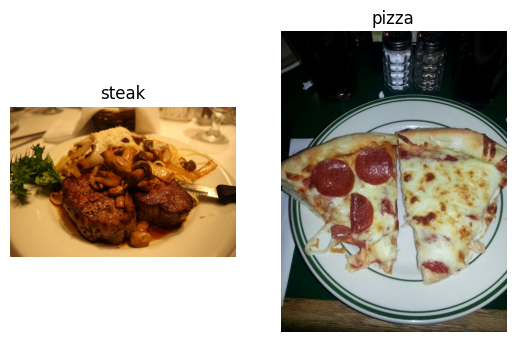

In [33]:
# Visualize data (requires function 'view_random_image' above)
plt.figure()
plt.subplot(1, 2, 1)
steak_img = view_random_image("pizza_steak/train/", "steak")
plt.subplot(1, 2, 2)
pizza_img = view_random_image("pizza_steak/train/", "pizza")

In [10]:
# Create train and test data generators and rescale the data.
 
train_data = tf.keras.utils.image_dataset_from_directory(
    directory=train_dir,
    image_size=(512,512),
    seed=42
) # batch_size=32 BY DEFAULT
 
test_data = tf.keras.utils.image_dataset_from_directory(
    directory=test_dir,
    image_size=(512,512),
    seed=42
) # batch_size=32 BY DEFAULT
 
resize_rescale = tf.keras.Sequential([
    tf.keras.layers.Resizing(height=224, width=224),
    tf.keras.layers.Rescaling(1./255)
])

# Apply resizing and rescaling to the datasets
train_data = train_data.map(lambda x, y: (resize_rescale(x), y))
test_data = test_data.map(lambda x, y: (resize_rescale(x), y))

Found 1500 files belonging to 2 classes.
Found 500 files belonging to 2 classes.


In [11]:
for images, labels in train_data:
    # Process the images and labels
    print(images.shape, labels.shape)
    break  # Remove this if you want to go through the entire dataset

(32, 224, 224, 3) (32,)


In [12]:
images[0].numpy(), images[0].shape

(array([[[4.19651896e-01, 2.18728945e-01, 6.47882223e-02],
         [4.25171822e-01, 2.24248856e-01, 7.03081265e-02],
         [4.03762400e-01, 2.09683031e-01, 6.52661100e-02],
         ...,
         [2.02015676e-02, 1.83724202e-02, 8.56256392e-03],
         [7.12923240e-03, 6.27250923e-03, 0.00000000e+00],
         [4.84960899e-03, 1.33352736e-02, 0.00000000e+00]],
 
        [[4.14303154e-01, 2.24296376e-01, 6.74352571e-02],
         [4.17176038e-01, 2.27169245e-01, 7.03081265e-02],
         [3.98225218e-01, 2.16451630e-01, 6.60357550e-02],
         ...,
         [1.25507265e-02, 9.00837220e-03, 4.69285576e-03],
         [2.27256329e-03, 9.13774129e-04, 0.00000000e+00],
         [3.40523873e-03, 1.53076323e-02, 4.31000721e-03]],
 
        [[4.04211432e-01, 2.30294898e-01, 6.87138960e-02],
         [4.08851892e-01, 2.36801416e-01, 7.42873847e-02],
         [4.00690496e-01, 2.28132159e-01, 7.48676509e-02],
         ...,
         [1.75200757e-02, 2.62386166e-03, 1.31193083e-03],
        

In [13]:
labels

<tf.Tensor: shape=(32,), dtype=int32, numpy=
array([0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 1])>

In [17]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

In [19]:
'''
Conv2D(
        filters,
        kernel_size,
        strides=(1, 1),
        padding="valid",
        data_format=None,
        dilation_rate=(1, 1),
        groups=1,
        activation=None,
        use_bias=True,
        kernel_initializer="glorot_uniform",
        bias_initializer="zeros",
        kernel_regularizer=None,
        bias_regularizer=None,
        activity_regularizer=None,
        kernel_constraint=None,
        bias_constraint=None,
        **kwargs
    ):
'''

model_4 = Sequential([
    Conv2D(
        filters = 10,
        kernel_size = 3,
        strides = 1,
        padding = "valid",
        activation = "relu",
        input_shape = (224, 224, 3)
    ),
    Conv2D(10, 3, activation = "relu"),
    Conv2D(10, 3, activation = "relu"),
    Flatten(),
    Dense(1, activation = "sigmoid")
])

model_4.compile(
    optimizer = Adam(),
    metrics = ["accuracy"],
    loss = "binary_crossentropy"
    )

model_4.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_8 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 conv2d_9 (Conv2D)           (None, 218, 218, 10)      910       
                                                                 
 flatten_4 (Flatten)         (None, 475240)            0         
                                                                 
 dense_11 (Dense)            (None, 1)                 475241    
                                                                 
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


In [21]:
len(train_data), len(test_data)

(47, 16)

In [22]:
history_4 = model_4.fit(
    train_data,
    epochs=10,
    validation_data=test_data
)

Epoch 1/10
47/47 [==============================] - 5s 82ms/step - loss: 0.6529 - accuracy: 0.6840 - val_loss: 0.4919 - val_accuracy: 0.7360
Epoch 2/10
47/47 [==============================] - 4s 71ms/step - loss: 0.4142 - accuracy: 0.8293 - val_loss: 0.4071 - val_accuracy: 0.8140
Epoch 3/10
47/47 [==============================] - 6s 110ms/step - loss: 0.2212 - accuracy: 0.9360 - val_loss: 0.4339 - val_accuracy: 0.7920
Epoch 4/10
47/47 [==============================] - 5s 106ms/step - loss: 0.0633 - accuracy: 0.9867 - val_loss: 0.4659 - val_accuracy: 0.8040
Epoch 5/10
47/47 [==============================] - 5s 103ms/step - loss: 0.0131 - accuracy: 0.9993 - val_loss: 0.5218 - val_accuracy: 0.8140
Epoch 6/10
47/47 [==============================] - 5s 105ms/step - loss: 0.0046 - accuracy: 1.0000 - val_loss: 0.6395 - val_accuracy: 0.7860
Epoch 7/10
47/47 [==============================] - 5s 106ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 0.6400 - val_accuracy: 0.7920
Epoch 8/

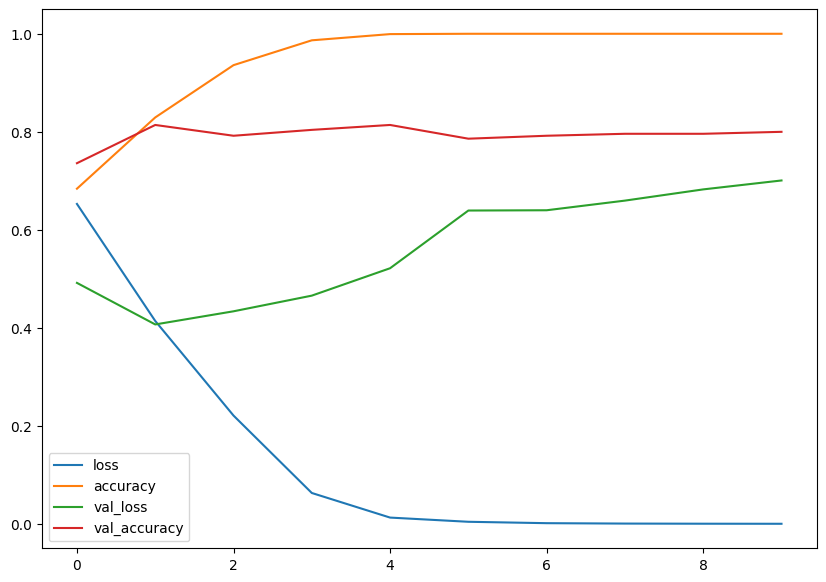

In [24]:
pd.DataFrame(history_4.history).plot(figsize = (10, 7));

In [16]:
# Plot the validation and training data separately
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """ 
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()


  plt.figure() # Use this whenever you want to create a NEW PLOT
  
  # Plot accuracy 
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

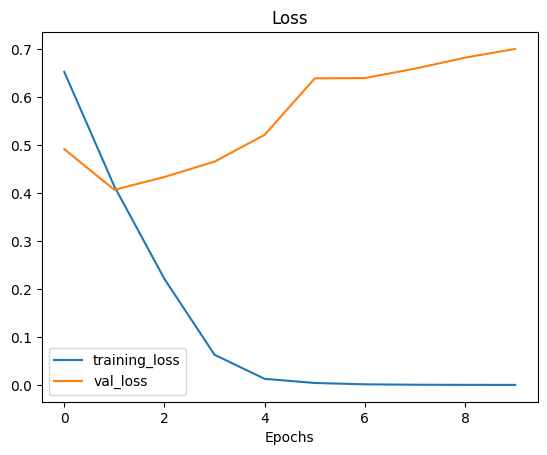

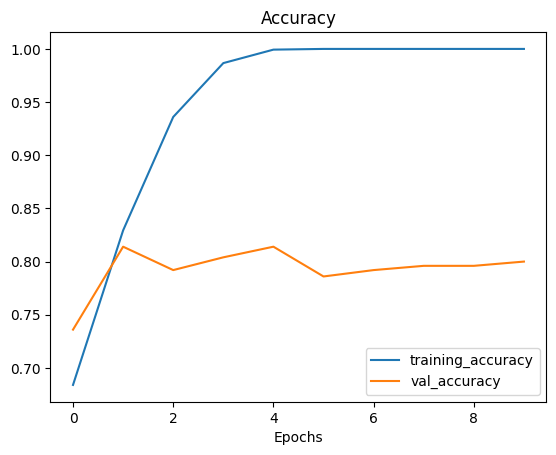

In [26]:
plot_loss_curves(history_4)

In [ ]:
model_5 = Sequential([
    Conv2D(10, 3, activation = "relu", input_shape = (224, 224, 3)),
    MaxPool2D(pool_size = 2),
    Conv2D(10, 3, activation = "relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation = "relu"),
    MaxPool2D(pool_size = 2),
    Flatten(),
    Dense(1, activation = "sigmoid")
])

model_5.compile(
    optimizer = "rmsprop",
    metrics = ["accuracy"],
    loss = "binary_crossentropy"
)

history_5 = model_5.fit(
    train_data,
    epochs = 20,
    validation_data = test_data 
)

Epoch 1/20
47/47 [==============================] - 6s 109ms/step - loss: 0.6519 - accuracy: 0.6180 - val_loss: 0.4817 - val_accuracy: 0.8100
Epoch 2/20
47/47 [==============================] - 6s 103ms/step - loss: 0.5135 - accuracy: 0.7473 - val_loss: 0.4115 - val_accuracy: 0.8340
Epoch 3/20
47/47 [==============================] - 6s 106ms/step - loss: 0.4595 - accuracy: 0.7940 - val_loss: 0.3960 - val_accuracy: 0.8180
Epoch 4/20
47/47 [==============================] - 5s 104ms/step - loss: 0.4219 - accuracy: 0.8047 - val_loss: 0.3414 - val_accuracy: 0.8680
Epoch 5/20
47/47 [==============================] - 5s 98ms/step - loss: 0.4051 - accuracy: 0.8253 - val_loss: 0.4278 - val_accuracy: 0.8000
Epoch 6/20
47/47 [==============================] - 5s 95ms/step - loss: 0.3951 - accuracy: 0.8213 - val_loss: 0.3202 - val_accuracy: 0.8880
Epoch 7/20
47/47 [==============================] - 5s 99ms/step - loss: 0.3907 - accuracy: 0.8273 - val_loss: 0.3344 - val_accuracy: 0.8420
Epoch 8/2

In [31]:
model_5.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 111, 111, 10)     0         
 2D)                                                             
                                                                 
 conv2d_17 (Conv2D)          (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                             
                                                                 
 conv2d_18 (Conv2D)          (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 26, 26, 10)      

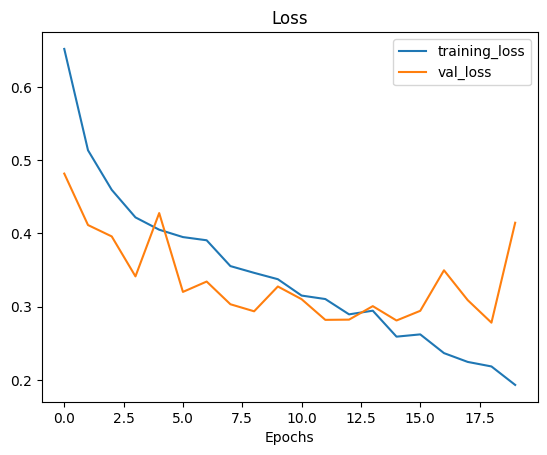

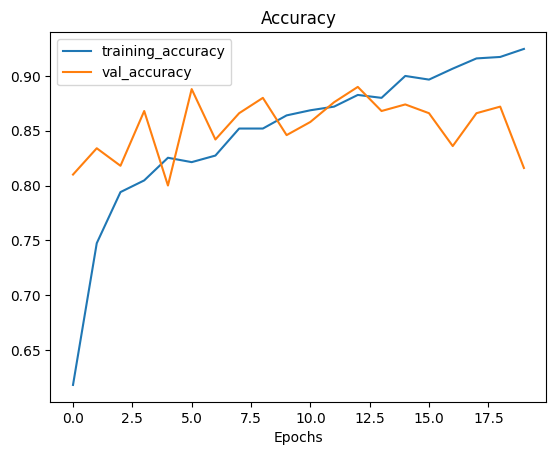

In [30]:
plot_loss_curves(history_5)

In [32]:
# USING ADAM INSTEAD OF RMSPROP

model_6 = Sequential([
    Conv2D(10, 3, activation = "relu", input_shape = (224, 224, 3)),
    MaxPool2D(pool_size = 2),
    Conv2D(10, 3, activation = "relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation = "relu"),
    MaxPool2D(pool_size = 2),
    Flatten(),
    Dense(1, activation = "sigmoid")
])

model_6.compile(
    optimizer = Adam(),
    metrics = ["accuracy"],
    loss = "binary_crossentropy"
)

history_6 = model_6.fit(
    train_data,
    epochs = 20,
    validation_data = test_data 
)

Epoch 1/20
47/47 [==============================] - 4s 70ms/step - loss: 0.6211 - accuracy: 0.6493 - val_loss: 0.4610 - val_accuracy: 0.7940
Epoch 2/20
47/47 [==============================] - 4s 71ms/step - loss: 0.4544 - accuracy: 0.7927 - val_loss: 0.3730 - val_accuracy: 0.8500
Epoch 3/20
47/47 [==============================] - 4s 80ms/step - loss: 0.4177 - accuracy: 0.8220 - val_loss: 0.3797 - val_accuracy: 0.8320
Epoch 4/20
47/47 [==============================] - 4s 82ms/step - loss: 0.3943 - accuracy: 0.8260 - val_loss: 0.3442 - val_accuracy: 0.8560
Epoch 5/20
47/47 [==============================] - 4s 82ms/step - loss: 0.3738 - accuracy: 0.8293 - val_loss: 0.3252 - val_accuracy: 0.8720
Epoch 6/20
47/47 [==============================] - 5s 90ms/step - loss: 0.3400 - accuracy: 0.8553 - val_loss: 0.3081 - val_accuracy: 0.8540
Epoch 7/20
47/47 [==============================] - 7s 125ms/step - loss: 0.3166 - accuracy: 0.8727 - val_loss: 0.2889 - val_accuracy: 0.8740
Epoch 8/20
4

In [33]:
model_6.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_19 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 111, 111, 10)     0         
 g2D)                                                            
                                                                 
 conv2d_20 (Conv2D)          (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 54, 54, 10)       0         
 g2D)                                                            
                                                                 
 conv2d_21 (Conv2D)          (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 26, 26, 10)      

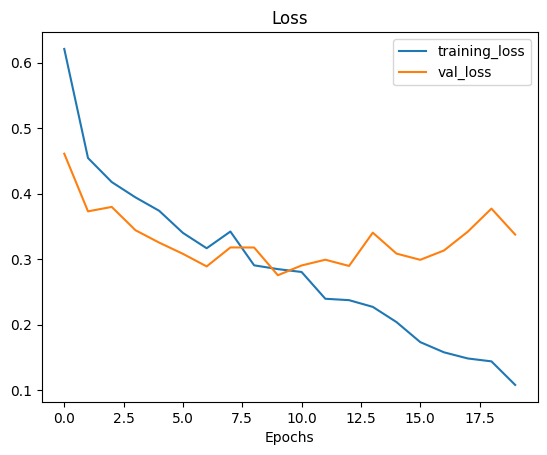

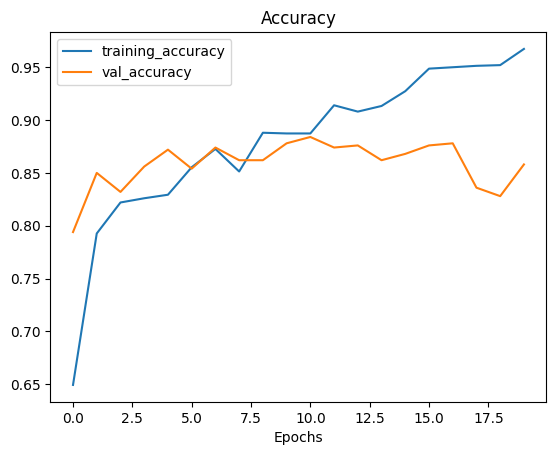

In [34]:
plot_loss_curves(history_6)

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create ImageDataGenerator training instance with data augmentation
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=20, # rotate the image slightly between 0 and 20 degrees (note: this is an int not a float)
                                             shear_range=0.2, # shear the image
                                             zoom_range=0.2, # zoom into the image
                                             width_shift_range=0.2, # shift the image width ways
                                             height_shift_range=0.2, # shift the image height ways
                                             horizontal_flip=True) # flip the image on the horizontal axis

# Create ImageDataGenerator training instance without data augmentation
train_datagen = ImageDataGenerator(rescale=1/255.) 

# Create ImageDataGenerator test instance without data augmentation
test_datagen = ImageDataGenerator(rescale=1/255.)

In [8]:
# Import data and augment it from training directory
print("Augmented training images:")
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224, 224),
                                                                   batch_size=32,
                                                                   class_mode='binary',
                                                                   shuffle=False) # Don't shuffle for demonstration purposes, usually a good thing to shuffle

# Create non-augmented data batches
print("Non-augmented training images:")
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode='binary',
                                               shuffle=False) # Don't shuffle for demonstration purposes

print("Unchanged test images:")
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224, 224),
                                             batch_size=32,
                                             class_mode='binary')

Augmented training images:
Found 1500 images belonging to 2 classes.
Non-augmented training images:
Found 1500 images belonging to 2 classes.
Unchanged test images:
Found 500 images belonging to 2 classes.


In [9]:
# Get data batch samples
images, labels = train_data.next()
augmented_images, augmented_labels = train_data_augmented.next() # Note: labels aren't augmented, they stay the same

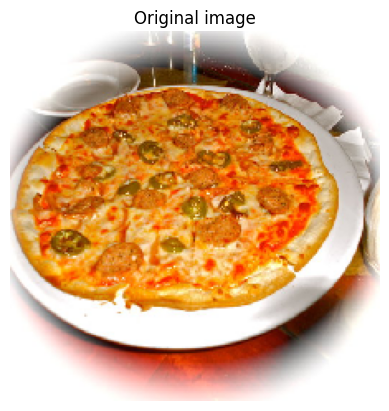

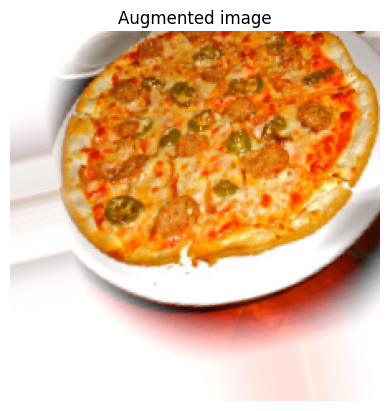

In [7]:
import random
# Show original image and augmented image
random_number = random.randint(0, 31) # we're making batches of size 32, so we'll get a random instance
plt.imshow(images[random_number])
plt.title(f"Original image")
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title(f"Augmented image")
plt.axis(False);

In [43]:
# USING ADAM INSTEAD OF RMSPROP

model_7 = Sequential([
    Conv2D(10, 3, activation = "relu", input_shape = (224, 224, 3)),
    MaxPool2D(pool_size = 2),
    Conv2D(10, 3, activation = "relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation = "relu"),
    MaxPool2D(pool_size = 2),
    Flatten(),
    Dense(1, activation = "sigmoid")
])

model_7.compile(
    optimizer = Adam(),
    metrics = ["accuracy"],
    loss = "binary_crossentropy"
)

history_7 = model_7.fit(
    train_data_augmented, # Fitting On Augmented Data
    epochs = 10,
    validation_data = test_data 
)

Epoch 1/10
47/47 [==============================] - 19s 398ms/step - loss: 0.7118 - accuracy: 0.4173 - val_loss: 0.6864 - val_accuracy: 0.6280
Epoch 2/10
47/47 [==============================] - 15s 327ms/step - loss: 0.6949 - accuracy: 0.4893 - val_loss: 0.6707 - val_accuracy: 0.7580
Epoch 3/10
47/47 [==============================] - 15s 310ms/step - loss: 0.6981 - accuracy: 0.6513 - val_loss: 0.7483 - val_accuracy: 0.5000
Epoch 4/10
47/47 [==============================] - 15s 328ms/step - loss: 0.6950 - accuracy: 0.5433 - val_loss: 0.6537 - val_accuracy: 0.7300
Epoch 5/10
47/47 [==============================] - 15s 308ms/step - loss: 0.6692 - accuracy: 0.6133 - val_loss: 0.6024 - val_accuracy: 0.6880
Epoch 6/10
47/47 [==============================] - 16s 335ms/step - loss: 0.6538 - accuracy: 0.6253 - val_loss: 0.6360 - val_accuracy: 0.5840
Epoch 7/10
47/47 [==============================] - 16s 330ms/step - loss: 0.6289 - accuracy: 0.6447 - val_loss: 0.5079 - val_accuracy: 0.8020

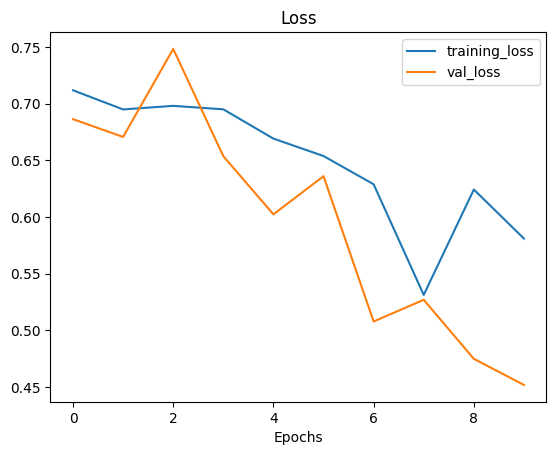

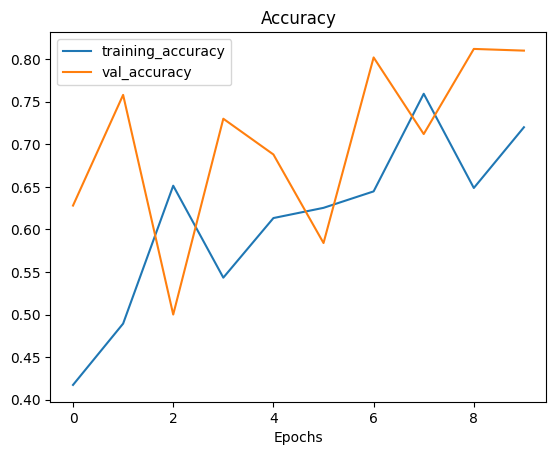

In [44]:
plot_loss_curves(history_7)

> 🤔 **Question:** Why didn't our model get very good results on the training set to begin with?

It's because when we created `train_data_augmented` we turned off data shuffling using `shuffle=False` which means our model only sees a batch of a single kind of images at a time. 

For example, the pizza class gets loaded in first because it's the first class. Thus it's performance is measured on only a single class rather than both classes. The validation data performance improves steadily because it contains shuffled data.

Since we only set `shuffle=False` for demonstration purposes (so we could plot the same augmented and non-augmented image), we can fix this by setting `shuffle=True` on future data generators.

You may have also noticed each epoch taking longer when training with augmented data compared to when training with non-augmented data (~25s per epoch vs. ~10s per epoch).

This is because the `ImageDataGenerator` instance augments the data as it's loaded into the model. The benefit of this is that it leaves the original images unchanged. The downside is that it takes longer to load them in.

> 🔑 **Note:** One possible method to speed up dataset manipulation would be to look into [TensorFlow's parrallel reads and buffered prefecting options](https://www.tensorflow.org/tutorials/images/data_augmentation).

It seems our validation loss curve is heading in the right direction but it's a bit jumpy (the most ideal loss curve isn't too spiky but a smooth descent, however, a perfectly smooth loss curve is the equivalent of a fairytale).

Let's see what happens when we shuffle the augmented training data.

In [10]:
# Import data and augment it from directories
train_data_augmented_shuffled = train_datagen_augmented.flow_from_directory(train_dir,
                                                                            target_size=(224, 224),
                                                                            batch_size=32,
                                                                            class_mode='binary',
                                                                            shuffle=True) # Shuffle data (default)

Found 1500 images belonging to 2 classes.


In [18]:
# USING ADAM INSTEAD OF RMSPROP

model_8 = Sequential([
    Conv2D(10, 3, activation = "relu", input_shape = (224, 224, 3)),
    MaxPool2D(pool_size = 2),
    Conv2D(10, 3, activation = "relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation = "relu"),
    MaxPool2D(pool_size = 2),
    Flatten(),
    Dense(1, activation = "sigmoid")
])

model_8.compile(
    optimizer = Adam(),
    metrics = ["accuracy"],
    loss = "binary_crossentropy"
)

history_8 = model_8.fit(
    train_data_augmented_shuffled, # Fitting On Augmented Data
    epochs = 10,
    validation_data = test_data 
)

Epoch 1/10
47/47 [==============================] - 14s 290ms/step - loss: 0.6744 - accuracy: 0.5607 - val_loss: 0.6508 - val_accuracy: 0.6100
Epoch 2/10
47/47 [==============================] - 14s 304ms/step - loss: 0.5429 - accuracy: 0.7220 - val_loss: 0.4018 - val_accuracy: 0.8260
Epoch 3/10
47/47 [==============================] - 19s 400ms/step - loss: 0.5019 - accuracy: 0.7553 - val_loss: 0.4650 - val_accuracy: 0.7940
Epoch 4/10
47/47 [==============================] - 15s 315ms/step - loss: 0.4661 - accuracy: 0.7833 - val_loss: 0.3677 - val_accuracy: 0.8440
Epoch 5/10
47/47 [==============================] - 14s 308ms/step - loss: 0.4617 - accuracy: 0.7920 - val_loss: 0.3950 - val_accuracy: 0.8280
Epoch 6/10
47/47 [==============================] - 16s 334ms/step - loss: 0.4491 - accuracy: 0.7987 - val_loss: 0.3252 - val_accuracy: 0.8680
Epoch 7/10
47/47 [==============================] - 16s 346ms/step - loss: 0.4271 - accuracy: 0.8087 - val_loss: 0.4445 - val_accuracy: 0.7980

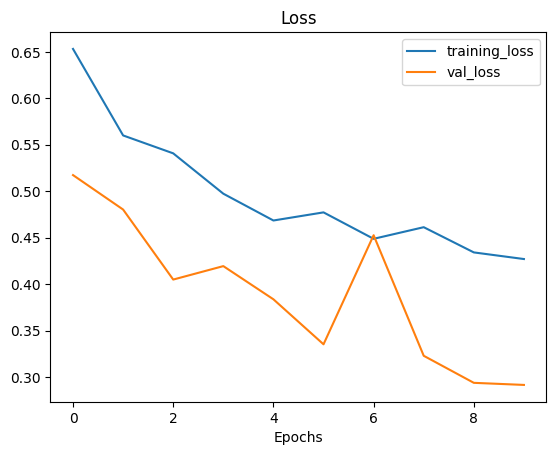

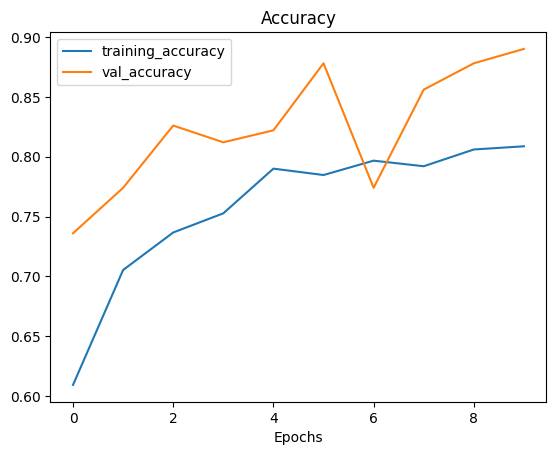

In [ ]:
plot_loss_curves(history_8)

Notice with `model_7` how the performance on the training dataset improves almost immediately compared to `model_6`. This is because we shuffled the training data as we passed it to the model using the parameter `shuffle=True` in the `flow_from_directory` method.

This means the model was able to see examples of both pizza and steak images in each batch and in turn be evaluated on what it learned from both images rather than just one kind.

Also, our loss curves look a little bit smoother with shuffled data (comparing `history_6` to `history_7`).

In [9]:
import requests
url = "https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg"
fname = url.split("/")[-1]
request = requests.get(url)
if request.status_code == 200:
    with open(fname,"wb") as f:
        f.write(request.content)

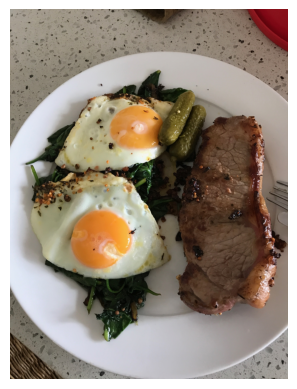

In [12]:
import matplotlib.image as mpimg
steak = mpimg.imread("C:/Deep_Learning/TensorFlow_For_Deep_Learning/images/03-steak.jpeg")
plt.imshow(steak);
plt.axis(False);

In [13]:
steak.shape

(4032, 3024, 3)

In [14]:
steak

array([[[162, 158, 149],
        [163, 159, 150],
        [166, 162, 153],
        ...,
        [136,  17,  23],
        [140,  21,  27],
        [140,  21,  27]],

       [[164, 160, 151],
        [164, 160, 151],
        [164, 160, 151],
        ...,
        [133,  14,  20],
        [134,  15,  21],
        [137,  18,  24]],

       [[166, 162, 153],
        [165, 161, 152],
        [163, 159, 150],
        ...,
        [136,  17,  23],
        [134,  15,  21],
        [136,  17,  23]],

       ...,

       [[154, 132, 111],
        [142, 121, 100],
        [101,  80,  59],
        ...,
        [164, 155, 148],
        [152, 141, 135],
        [140, 129, 123]],

       [[141, 119,  96],
        [138, 118,  94],
        [106,  85,  64],
        ...,
        [158, 147, 141],
        [142, 131, 125],
        [138, 127, 121]],

       [[148, 126, 102],
        [148, 128, 103],
        [114,  93,  72],
        ...,
        [153, 142, 136],
        [138, 127, 121],
        [143, 132, 126]]

In [21]:
# Create a function to import an image and resize it to be able to be used with our model
def load_and_prep_image(filename, img_shape=224):
  """
  Reads an image from filename, turns it into a tensor
  and reshapes it to (img_shape, img_shape, colour_channel).
  """
  # Read in target file (an image)
  img = tf.io.read_file(filename)

  # Decode the read file into a tensor & ensure 3 colour channels 
  # (our model is trained on images with 3 colour channels and sometimes images have 4 colour channels)
  img = tf.image.decode_image(img, channels=3)

  # Resize the image (to the same size our model was trained on)
  img = tf.image.resize(img, size = [img_shape, img_shape])

  # Rescale the image (get all values between 0 and 1)
  img = img/255.
  return img

In [23]:
# Load in and preprocess our custom image
steak = load_and_prep_image("images/03-steak.jpeg")
steak

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.6377451 , 0.6220588 , 0.57892156],
        [0.6504902 , 0.63186276, 0.5897059 ],
        [0.63186276, 0.60833335, 0.5612745 ],
        ...,
        [0.52156866, 0.05098039, 0.09019608],
        [0.49509802, 0.04215686, 0.07058824],
        [0.52843136, 0.07745098, 0.10490196]],

       [[0.6617647 , 0.6460784 , 0.6107843 ],
        [0.6387255 , 0.6230392 , 0.57598037],
        [0.65588236, 0.63235295, 0.5852941 ],
        ...,
        [0.5352941 , 0.06862745, 0.09215686],
        [0.529902  , 0.05931373, 0.09460784],
        [0.5142157 , 0.05539216, 0.08676471]],

       [[0.6519608 , 0.6362745 , 0.5892157 ],
        [0.6392157 , 0.6137255 , 0.56764704],
        [0.65637255, 0.6269608 , 0.5828431 ],
        ...,
        [0.53137255, 0.06470589, 0.08039216],
        [0.527451  , 0.06862745, 0.1       ],
        [0.52254903, 0.05196078, 0.0872549 ]],

       ...,

       [[0.49313724, 0.42745098, 0.31029412],
        [0.05

In [24]:
# Make a prediction on our custom image (spoiler: this won't work)
model_8.predict(steak)

ValueError: in user code:

    File "c:\Deep_Learning\TensorFlow_For_Deep_Learning\new_venv\lib\site-packages\keras\engine\training.py", line 2041, in predict_function  *
        return step_function(self, iterator)
    File "c:\Deep_Learning\TensorFlow_For_Deep_Learning\new_venv\lib\site-packages\keras\engine\training.py", line 2027, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Deep_Learning\TensorFlow_For_Deep_Learning\new_venv\lib\site-packages\keras\engine\training.py", line 2015, in run_step  **
        outputs = model.predict_step(data)
    File "c:\Deep_Learning\TensorFlow_For_Deep_Learning\new_venv\lib\site-packages\keras\engine\training.py", line 1983, in predict_step
        return self(x, training=False)
    File "c:\Deep_Learning\TensorFlow_For_Deep_Learning\new_venv\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "c:\Deep_Learning\TensorFlow_For_Deep_Learning\new_venv\lib\site-packages\keras\engine\input_spec.py", line 295, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_1" is incompatible with the layer: expected shape=(None, 224, 224, 3), found shape=(32, 224, 3)


There's one more problem...

Although our image is in the same shape as the images our model has been trained on, we're still missing a dimension.

Remember how our model was trained in batches?

Well, the batch size becomes the first dimension.

So in reality, our model was trained on data in the shape of `(batch_size, 224, 224, 3)`.

We can fix this by adding an extra to our custom image tensor using [`tf.expand_dims`](https://www.tensorflow.org/api_docs/python/tf/expand_dims).

In [25]:
# Add an extra axis
print(f"Shape before new dimension: {steak.shape}")
steak = tf.expand_dims(steak, axis=0) # add an extra dimension at axis 0
#steak = steak[tf.newaxis, ...] # alternative to the above, '...' is short for 'every other dimension'
print(f"Shape after new dimension: {steak.shape}")
steak

Shape before new dimension: (224, 224, 3)
Shape after new dimension: (1, 224, 224, 3)


<tf.Tensor: shape=(1, 224, 224, 3), dtype=float32, numpy=
array([[[[0.6377451 , 0.6220588 , 0.57892156],
         [0.6504902 , 0.63186276, 0.5897059 ],
         [0.63186276, 0.60833335, 0.5612745 ],
         ...,
         [0.52156866, 0.05098039, 0.09019608],
         [0.49509802, 0.04215686, 0.07058824],
         [0.52843136, 0.07745098, 0.10490196]],

        [[0.6617647 , 0.6460784 , 0.6107843 ],
         [0.6387255 , 0.6230392 , 0.57598037],
         [0.65588236, 0.63235295, 0.5852941 ],
         ...,
         [0.5352941 , 0.06862745, 0.09215686],
         [0.529902  , 0.05931373, 0.09460784],
         [0.5142157 , 0.05539216, 0.08676471]],

        [[0.6519608 , 0.6362745 , 0.5892157 ],
         [0.6392157 , 0.6137255 , 0.56764704],
         [0.65637255, 0.6269608 , 0.5828431 ],
         ...,
         [0.53137255, 0.06470589, 0.08039216],
         [0.527451  , 0.06862745, 0.1       ],
         [0.52254903, 0.05196078, 0.0872549 ]],

        ...,

        [[0.49313724, 0.42745098, 

In [26]:
# Make a prediction on custom image tensor
pred = model_8.predict(steak)
pred

1/1 [==============================] - 0s 389ms/step


array([[0.9402729]], dtype=float32)

In [27]:
def pred_and_plot(model, filename, class_names):
  """
  Imports an image located at filename, makes a prediction on it with
  a trained model and plots the image with the predicted class as the title.
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Get the predicted class
  pred_class = class_names[int(tf.round(pred)[0][0])]

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

In [ ]:
pred_class = class_names[int(tf.round(pred)[0][0])]
pred_class

'steak'

1/1 [==============================] - 0s 23ms/step


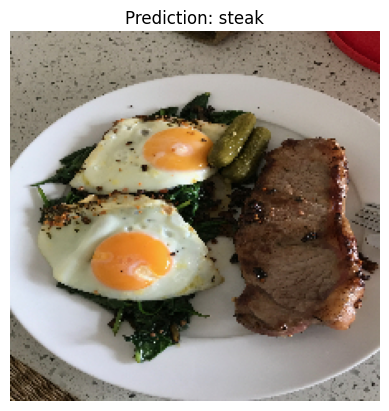

In [30]:
# Test our model on a custom image
pred_and_plot(model_8, "images/03-steak.jpeg", class_names)

1/1 [==============================] - 0s 20ms/step


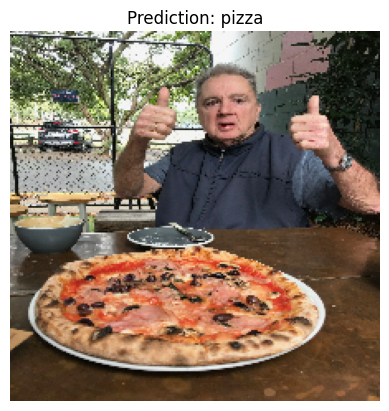

In [32]:
pred_and_plot(model_8, "images/03-pizza-dad.jpeg", class_names)